In [6]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Make the size and fonts larger for this presentation
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

<a id=exercise_1></a>
# Exercise 1

Generate a line plot with the daily data from 2023 of 3 energy sources

With these characteristics:
* All lines in grey tones
* different markers or line types for each line
* with a legend located at the 'upper left'


In [7]:
daily_csv = os.path.join(os.getcwd(), 'resources', 'power_sources_daily_2014_2023.csv')
df_daily = pd.read_csv(daily_csv, index_col=0)

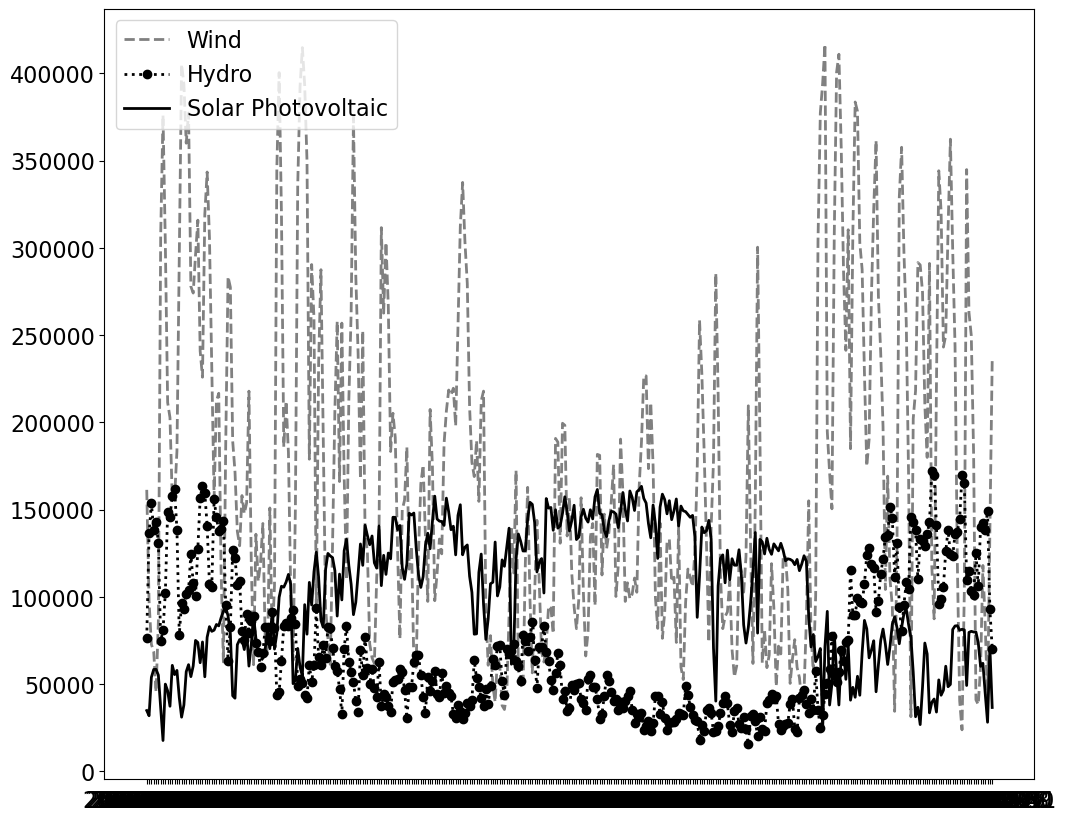

In [13]:
year_mask = df_daily.year == 2023
plt.plot(df_daily.loc[year_mask, ['Wind']], '--', color='0.5', label='Wind')
plt.plot(df_daily.loc[year_mask, ['Hydro']], ':ok', label='Hydro')
plt.plot(df_daily.loc[year_mask, ['SolarPhotovoltaic']], '-k', label='Solar Photovoltaic')

plt.legend(loc='upper left')

<a id=exercise_2></a>
## Exercise 2

Pick 3 differents energy sources.

Plot the daily energy generated from each source as normalized 1D histograms in a figure with 3 axes in 1 column, with shared x-axis and y-axis.

Put the name of the energy source somewhere in the axes so it can be identified.

There have to be no x-ticks in the top 2 axes and no vertical space between them.

Remove y-ticks.

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
daily_csv = os.path.join(os.getcwd(), 'resources', 'power_sources_daily_2014_2023.csv')
df_daily = pd.read_csv(daily_csv, index_col=0)

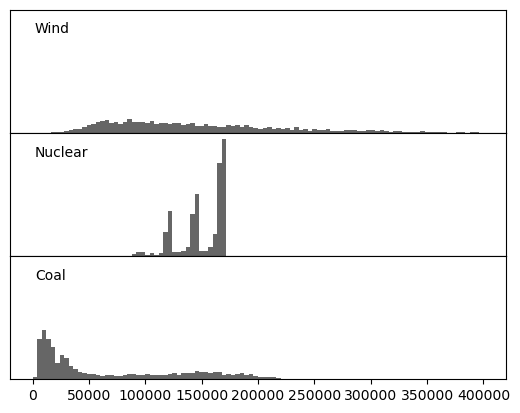

In [12]:
s1 = df_daily['Wind']
s2 = df_daily['Nuclear']
s3 = df_daily['Coal']

bins = np.linspace(0, 400000, 101)

fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, sharex=True, sharey=True, gridspec_kw={'hspace':0})
ax1.hist(s1, color='0.4', bins=bins, density=True)
ax2.hist(s2, color='0.4', bins=bins, density=True)
ax3.hist(s3, color='0.4', bins=bins, density=True)

ax1.text(0.05, 0.9,'Wind', ha='left', va='top', transform=ax1.transAxes)
ax2.text(0.05, 0.9,'Nuclear', ha='left', va='top', transform=ax2.transAxes)
ax3.text(0.05, 0.9,'Coal', ha='left', va='top', transform=ax3.transAxes)
for ax in fig.get_axes():
    ax.set_yticks([])

<a id=exercise_3></a>
# Exercise 3

Load the file `resources/nip.fits` using fits.
```
hdul = fits.open('resources/nip.fits')
```

Plot the matrix in `hdul[1].data` with imshow. You won't see much.

Do a histogram (Hint: use the `log` argument) to analyze the values in the matrix.

Use imshow (with `norm`) to see what's inside the plot.

Use `imshow` + `clim` to see a higher detail of the background.

Put everything in a single figure mith multiple axes

In [ ]:
import os
from astropy.io import fits
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm

fits_file = os.path.join(path_to_the_repo, 'matplotlib', 'resources', 'nip.fits')

hdul = fits.open(fits_file)

fig = plt.figure(figsize=(12., 12.))

gs = gridspec.GridSpec(3, 4, hspace=0.)

ax1 = fig.add_subplot(gs[:2, :2])
ax1.imshow(hdul[1].data, clim=(200, 66000), norm=LogNorm(), cmap='gist_heat')

ax2 = fig.add_subplot(gs[:2, 2:])
im2 = ax2.imshow(hdul[1].data, clim=(0, 200), cmap='Greys')

ax3 = fig.add_subplot(gs[2, :2])
ax3.hist(hdul[1].data.flatten(), bins=100, log=True);

ax4 = fig.add_subplot(gs[2, 2:])
ax4.hist(hdul[1].data.flatten(), bins=100, range=(0, 300));

plt.tight_layout()